## 01. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import Data

In [2]:
# define path:

path = r'/Users/piperdutcher/Documents/Achievement 4/04-2024 Instacart Basket Analysis'

In [3]:
# Import Data Set - Complete Data:
df_comp = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'combined_customer_order_product_data.pkl'))

In [4]:
# import data - departments

departments = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False)


## 03. Task

In [5]:
# create a subset of the data set (using a 70-30 sample)

np.random.seed(3)
df_sample = np.random.rand(len(df_comp)) <= 0.7

In [6]:
df_sample

array([ True, False,  True, ...,  True,  True,  True])

In [7]:
# store 70% in sample_large, store 30% in sample_small

sample_large = df_comp[df_sample]
sample_small = df_comp[~df_sample]

In [8]:
# check to make sure the length of sample_large+sample_small = len(df_comp)

len(df_comp)

32404859

In [9]:
len(sample_large) + len(sample_small)

32404859

In [10]:
pd.set_option('display.max_columns', None)
sample_large.head()

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,mean_prod_price,spender_type,median_since_last_order,customer_frequency_type,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21.0,38928,2,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,38928,3,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both


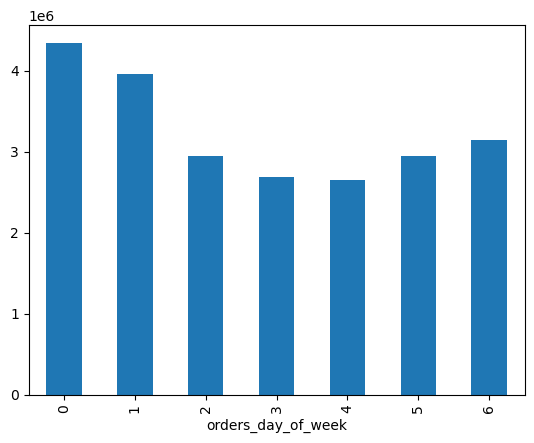

In [11]:
bar_dow = sample_large['orders_day_of_week'].value_counts().sort_index().plot.bar()

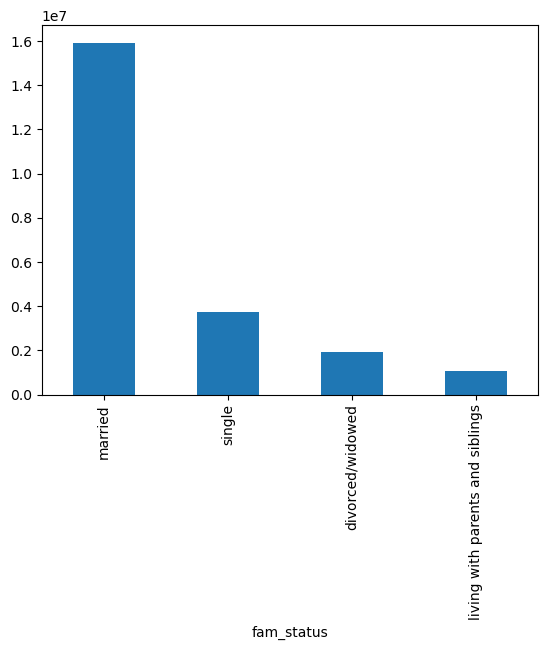

In [12]:
bar_fam_status = sample_large['fam_status'].value_counts().plot.bar()

In [13]:
# save order DOW bar
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_days_of_week_large_sample.png'))

In [14]:
# save fam_status_bar
bar_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_family_status_large_sample.png'))

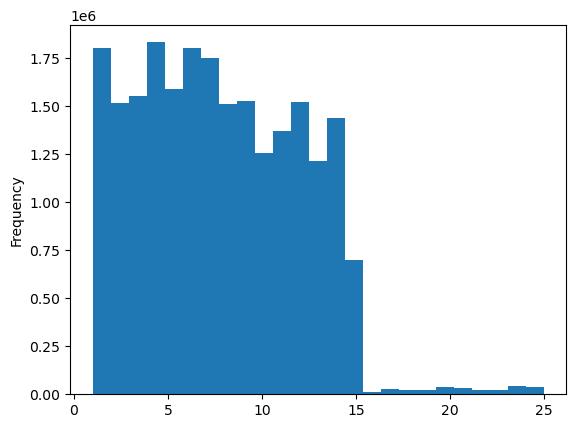

In [27]:
# histogram for product prices

sample_prices_hist = sample_large['prices'].plot.hist(bins = 25)

In [16]:
# save sample_prices_hist
sample_prices_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_prices_hist_large_sample.png'))

In [17]:
sample_large.head()

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,mean_prod_price,spender_type,median_since_last_order,customer_frequency_type,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21.0,38928,2,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,38928,3,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both


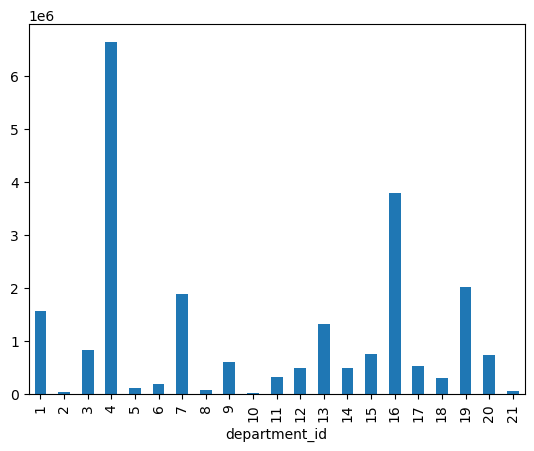

In [18]:
# bar chart for number of purchases by department

dept_purchases_bar = sample_large['department_id'].value_counts().sort_index().plot.bar()

In [58]:
# checking departments to see top 3 departments (4,16,19)

departments.head(25)

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [20]:
# most instacarted items: alcohol, household, deli
# export bar chart

dept_purchases_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'purchases_by_dept_id_bar.png'))

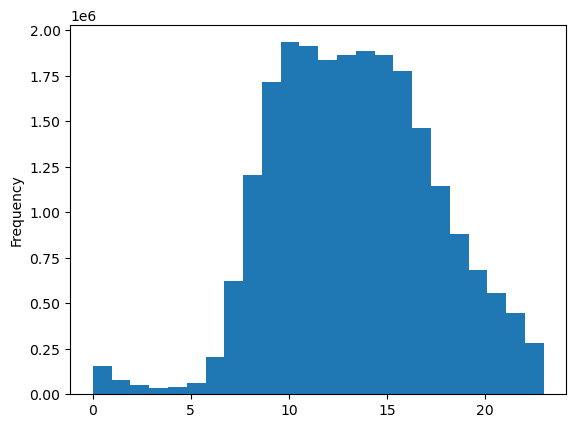

In [41]:
# histogram for order_hour_of_day, use 24 for bins as there are 24 hours in a day

hist_order_hod = sample_large['order_hour_of_day'].plot.hist(bins = 24)

In [39]:
sample_large['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      153290
1       80934
2       48420
3       35925
4       37299
5       61483
6      203484
7      623872
8     1202750
9     1717460
10    1933201
11    1914922
12    1833127
13    1861993
14    1883470
15    1863040
16    1773883
17    1460802
18    1145379
19     881140
20     683405
21     557637
22     444103
23     281840
Name: count, dtype: int64

In [40]:
# the above histogram shows that the majority of instacart orders are between 8am and 6pm
# this can be verfied by looking at the value counts for each hour 

In [42]:
# export histogram:

hist_order_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_hist_sample_large.png'))

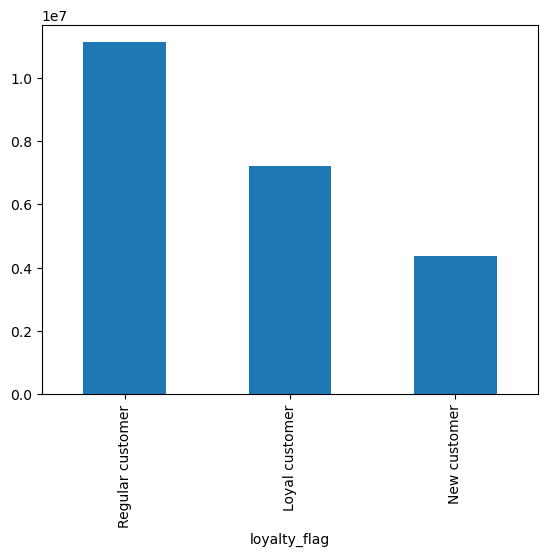

In [44]:
# create a bar chart for loyalty flag

loyalty_flag_bar = sample_large['loyalty_flag'].value_counts().plot.bar()

In [45]:
# there is the highest count of regular customers, with loyal customers following, and new customers being last

#export bar chart

loyalty_flag_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_bar_large_sample.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


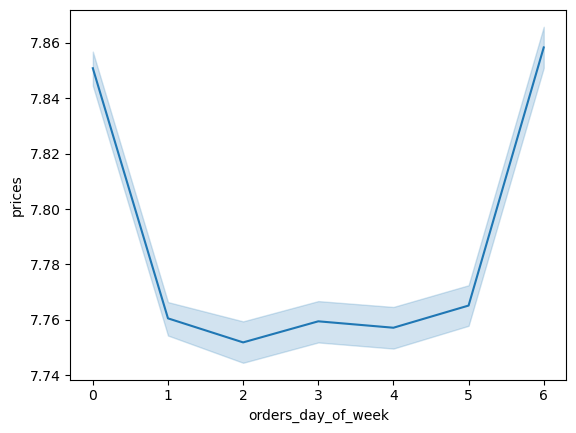

In [64]:
# line graph comparing prices and order_day_of_week
# for computing power, will switch to small sample.

prices_dow_line = sns.lineplot(data = sample_small, x = 'orders_day_of_week',y = 'prices')

In [65]:
# export prices_dow_line

prices_dow_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_day_of_week_prices_line_small_sample.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


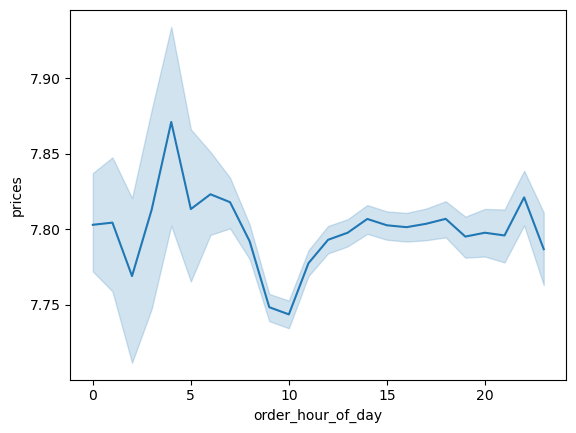

In [47]:
# line graph comparing prices and order_hour_of_day
# for computing power, will switch to small sample.

prices_ohd_line = sns.lineplot(data = sample_small, x = 'order_hour_of_day',y = 'prices')

In [48]:
# export prices_ohd_line

prices_ohd_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_prices_line_small_sample.png'))

In [49]:
# customers tend to order more expensive items earlier in the day.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


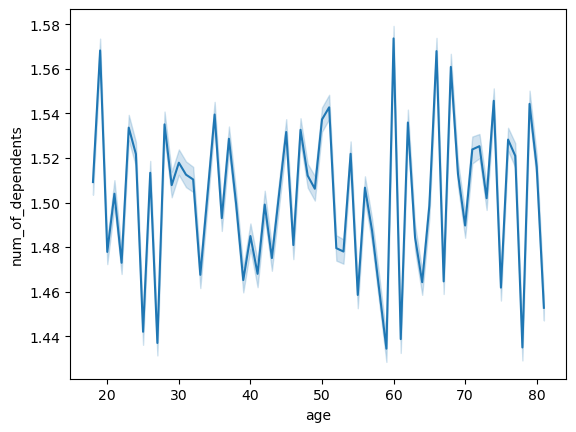

In [51]:
# line chart: connection between age and family situation (age and num_of_dependents)

age_dependents_line = sns.lineplot(data = sample_small, x = 'age',y = 'num_of_dependents')

In [53]:
# export age_dependents_line

age_dependents_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','age_dependents_line_small_sample.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


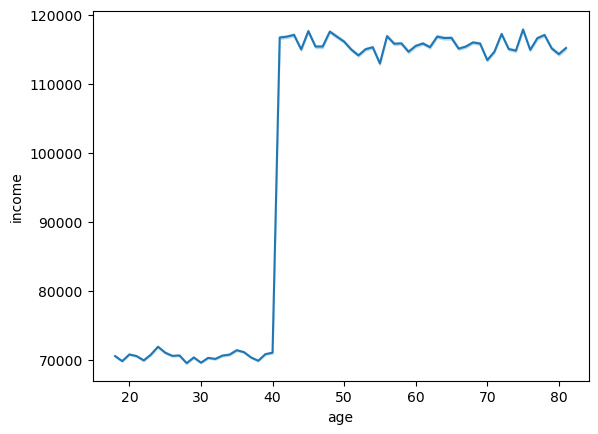

In [55]:
# age vs income line

age_vs_income = sns.lineplot(data = sample_small, x = 'age', y = 'income')

In [56]:
# export age_vs_income

age_vs_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','age_vs_income_line.png'))

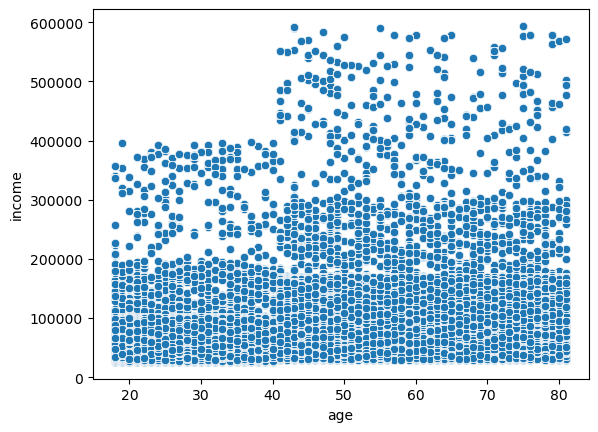

In [60]:
# age v income scatter

age_v_income_scatter = sns.scatterplot(data = sample_small, x = 'age', y = 'income')

In [62]:
# export age_vs_income_scatter

age_v_income_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','age_vs_income_scatter.png'))

In [66]:
df_comp.head()

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,mean_prod_price,spender_type,median_since_last_order,customer_frequency_type,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Busiest hours,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both


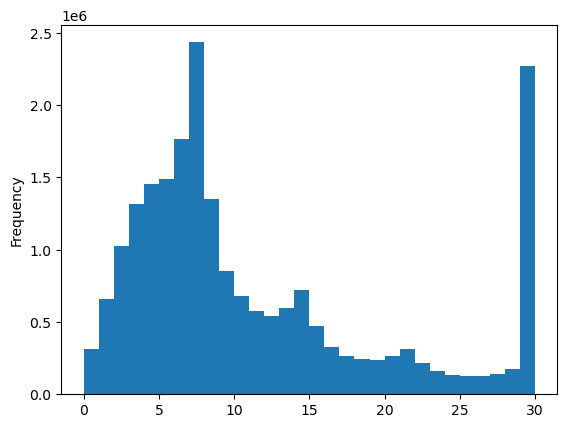

In [73]:
# histogram days_since_prior_order

days_since_prior_hist = sample_large['days_since_prior_order'].plot.hist(bins = 30)

In [75]:
# export days_since_prior_hist

days_since_prior_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','days_since_prior_order_hist_large_sample.png'))

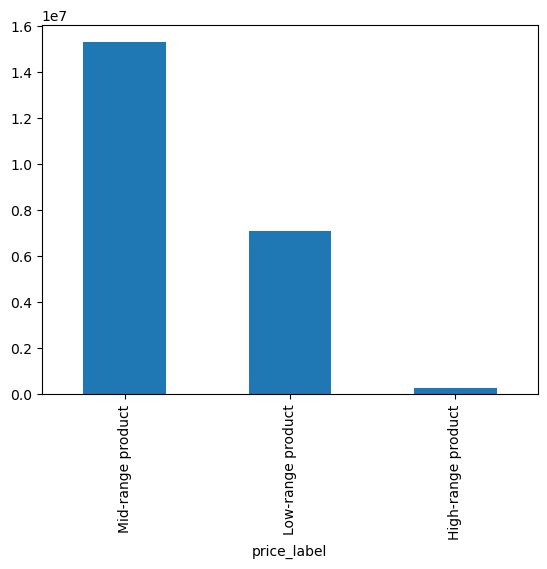

In [76]:
# price label bar

price_label_bar = sample_large['price_label'].value_counts().plot.bar()

In [77]:
# export price label bar

price_label_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','price_label_bar_large_sample.png'))

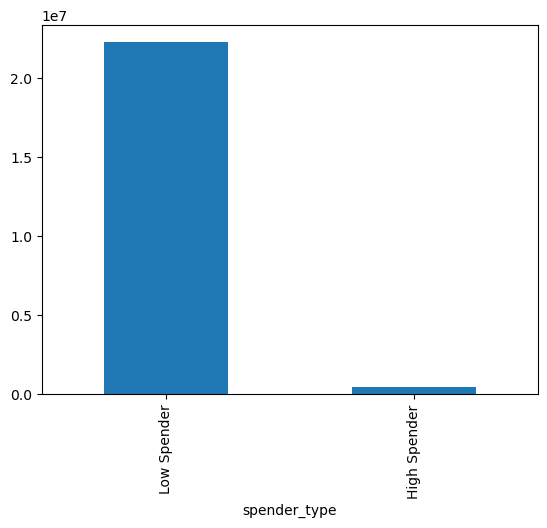

In [78]:
# spender type bar

spender_type_bar = sample_large['spender_type'].value_counts().plot.bar()

In [79]:
#most customers are low spenders
# export spender type bar

spender_type_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','spender_type_bar_large_sample.png'))